In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline 

# Preparing and Understanding the data

In [52]:
df=pd.read_csv("/Users/fay./Desktop/untitled folder 2/DelayedFlights.csv") 
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [4]:
df.isna().sum()


Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

There is a lot of null 

In [5]:
df.shape

(1936758, 30)

In [6]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()



Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

No more null :)

In [9]:
df.shape


(1247486, 30)

In [10]:
df = df.drop("Unnamed: 0",1) #Empty

In [11]:
df.shape

(1247486, 29)

Here will Dropping all duplicated Rows

In [12]:
df.duplicated().sum()
    

2

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()
    

0

In [49]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
count,1247484.0,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,...,1.247484e+06,1.247484e+06,1247484.0,1247484.0,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06
mean,2008.0,6.065405e+00,1.572540e+01,3.980082e+00,1.558831e+03,1.487948e+03,1.616748e+03,1.652457e+03,2.276528e+03,1.353779e+02,...,7.297229e+00,2.066035e+01,0.0,0.0,1.917942e+01,3.703361e+00,1.502161e+01,9.013743e-02,2.529653e+01,1.358984e+00
std,0.0,3.508936e+00,8.793001e+00,1.993271e+00,4.543301e+02,4.211782e+02,5.839417e+02,4.617373e+02,1.997548e+03,7.229641e+01,...,6.033244e+00,1.667984e+01,0.0,0.0,4.354626e+01,2.149155e+01,3.383309e+01,2.022717e+00,4.205491e+01,4.797027e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.232000e+03,1.150000e+03,1.326000e+03,1.340000e+03,6.370000e+02,8.300000e+01,...,4.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.618000e+03,1.529000e+03,1.737000e+03,1.722000e+03,1.589000e+03,1.180000e+02,...,6.000000e+00,1.600000e+01,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.924000e+03,1.830000e+03,2.048000e+03,2.022000e+03,3.676000e+03,1.670000e+02,...,8.000000e+00,2.400000e+01,0.0,0.0,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01,2.000000e+00
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,1.114000e+03,...,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,2.000000e+00


In [54]:

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2)
for dataset in df:
    df.loc[df['ArrDelay'] < 15, 'Status'] = 0  #if the delay  less than 15 minthat means flight was on time
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1 #if the delay  equal or more than 15 min its a slightly delayed
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2 #if the delay equal or more than 60 min its a highly delayed
 
    


In [31]:
df['UniqueCarrier'].value_counts()

WN    203559
AA    132257
MQ     97555
UA     95465
OO     88991
DL     72252
XE     72008
US     59508
CO     58958
EV     56781
NW     54744
YV     50646
FL     46991
OH     39292
B6     38232
9E     35630
AS     24012
F9     15938
HA      4325
AQ       340
Name: UniqueCarrier, dtype: int64

- **Carrier names** 
- **WN**:    Southwest Airlines
- **AA**:     American Airlines
- **MQ**:    American Eagle Airlines
- **UA**:     United Airlines
- **OO**:     Skywest Airlines
- **DL**:     Delta Airlines
- **XE**:     ExpressJet
- **CO**:     Continental Airlines
- **US**:     US Airways
- **EV**:     Atlantic Southeast Airlines
- **NW**:     Northwest Airlines
- **FL**:     AirTran Airways
- **YV**:     Mesa Airlines
- **B6**:     JetBlue Airways
- **OH**:     Comair
- **9E**:     Pinnacle Airlines
- **AS**:     Alaska Airlines
- **F9**:     Frontier Airlines
- **HA**:     Hawaiian Airlines
- **AQ**:     Aloha Airlines


In [55]:
Delayedflights = df[(df.Status >= 1) &(df.Status < 3)]

/Users/fay./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


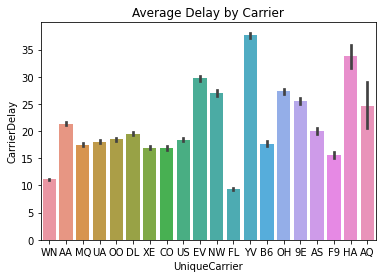

In [56]:
ax=sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights, order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax.set_title('Average Delay by Carrier');

Carriers with higher average delay generation are **Mesa Airlines (YV)** with 37 minutes per flight, **Hawaian Airlines (HA)** with 33 minutes per flight and **ExpressJet (EV)** with 29 minutes per flight

**Mesa Airlines** registered the maximum Carrier Delay for 2008.


/Users/fay./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


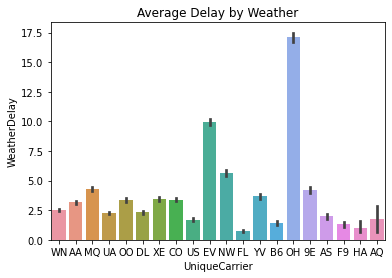

In [57]:
ax=sns.barplot('UniqueCarrier','WeatherDelay', data=Delayedflights, order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax.set_title('Average Delay by Weather');

Carriers with higher average delay by Weather generation are **Comair (OH)** , **Atlantic Southeast Airlines
 (EV)** 

**Comair** registered the maximum Carrier Delay by Weather for 2008.

/Users/fay./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


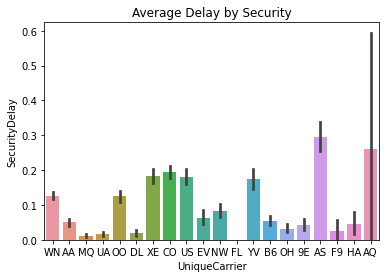

In [61]:
ax=sns.barplot('UniqueCarrier','SecurityDelay', data=Delayedflights, order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax.set_title('Average Delay by Security');

Carriers with higher average delay by Security generation are **Alaska Airlines (AS)** , **Aloha Airlines
 (AQ)** 

**Alaska Airlines** registered the maximum Carrier Delay by Securityfor 2008.

In [38]:
df.Cancelled.value_counts()

0    1247484
Name: Cancelled, dtype: int64

In [39]:
df.CancellationCode.value_counts()

N    1247484
Name: CancellationCode, dtype: int64

In [59]:
df.Diverted.value_counts()

0    1929004
1       7754
Name: Diverted, dtype: int64

There are no Cancelled  and Diverted Flight in the dataset 